# Advanced Machine Learning with Python

Fernando Cervantes (<fernando.cervantes@jax.org>) Systems Analyst I -
Imaging Applications group, JAX Research IT

# Workshop outcomes

-   Understand the process of training ML models.
-   Load pre-trained ML models and fine-tune them with new data.
-   Evaluate the performance of ML models.
-   Adapt ML models for different tasks from pre-trained models.

# 0. Setup environment

## Select runtime and connect

On the top right corner of the page, click the drop-down arrow to the
right of the `Connect` button and select `Change runtime type`.

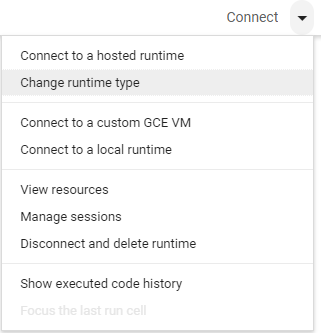

------------------------------------------------------------------------

Make sure `Python 3` runtime is selected. For this part of the workshop
`CPU` acceleration is enough.

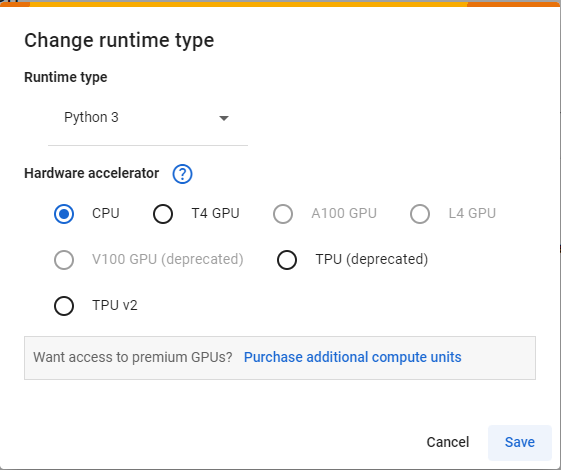

------------------------------------------------------------------------

Now we can connect to the runtime by clicking `Connect`. This will
create a **V**irtual **M**achine (**VM**) with compute resources we can
use for a limited amount of time.

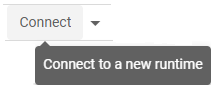

> **Caution**
>
> In free Colab accounts these resources are not guaranteed and can be
> taken away without notice (preemptible machines).
>
> Data stored in this runtime will be lost if not moved into other
> storage when the runtime is deleted.

# 1. What is **M**achine **L**earning (**ML**)?

------------------------------------------------------------------------

## **M**achine **L**earning (**ML**)

Sub-field of **Artificial Intelligence** that develops methods to
address tasks that require human intelligence

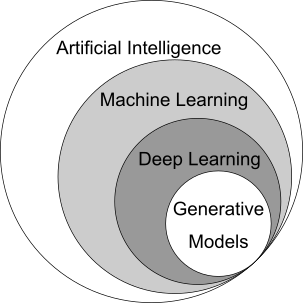

## Artificial intelligence tasks

------------------------------------------------------------------------

## Common tasks

**Classification**

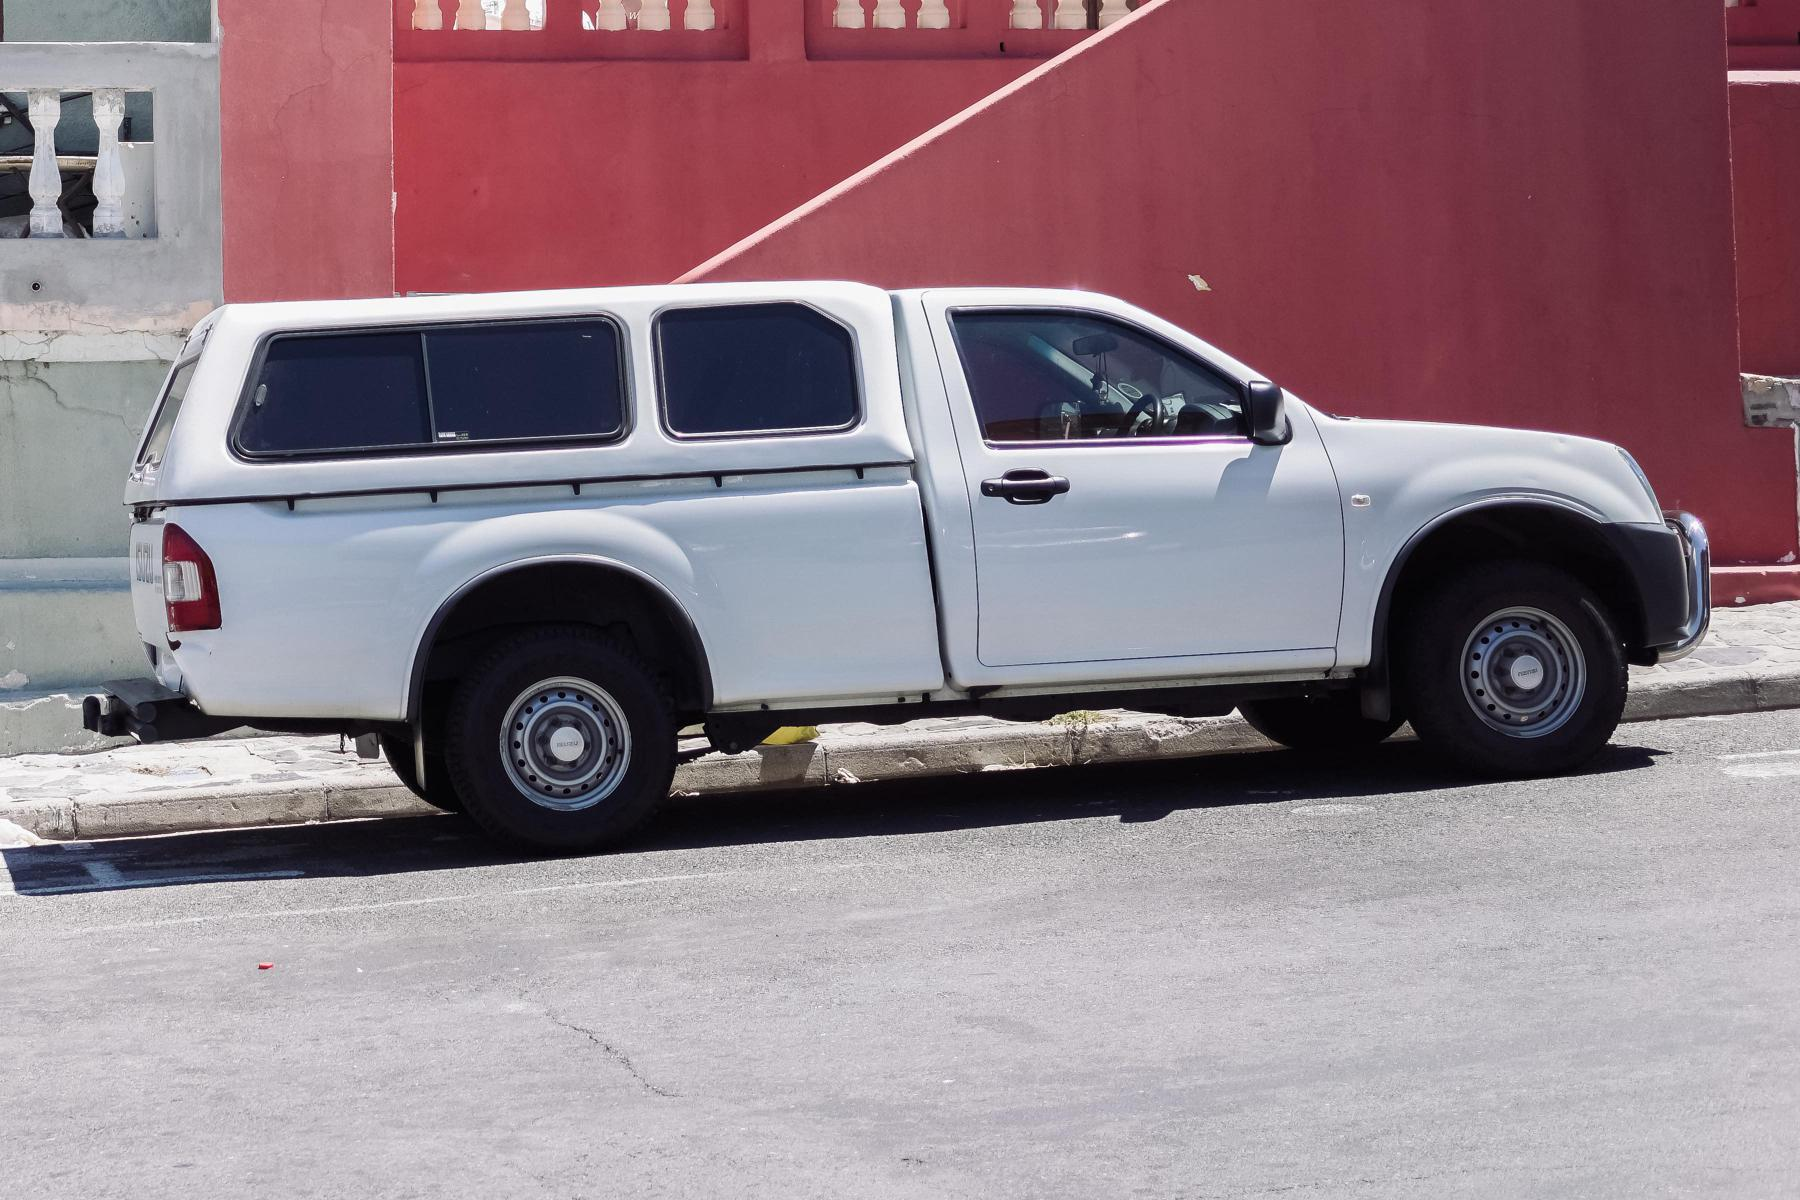

what is this?

**Detection**

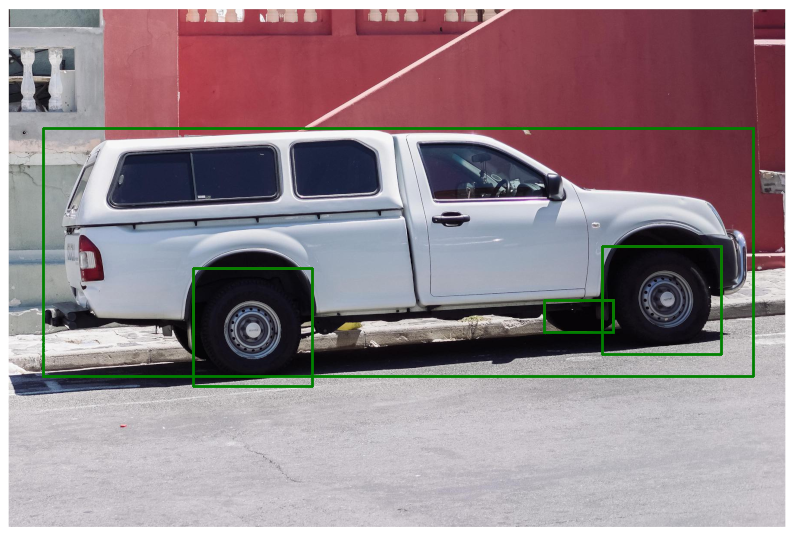

where is something?

**Segmentation**

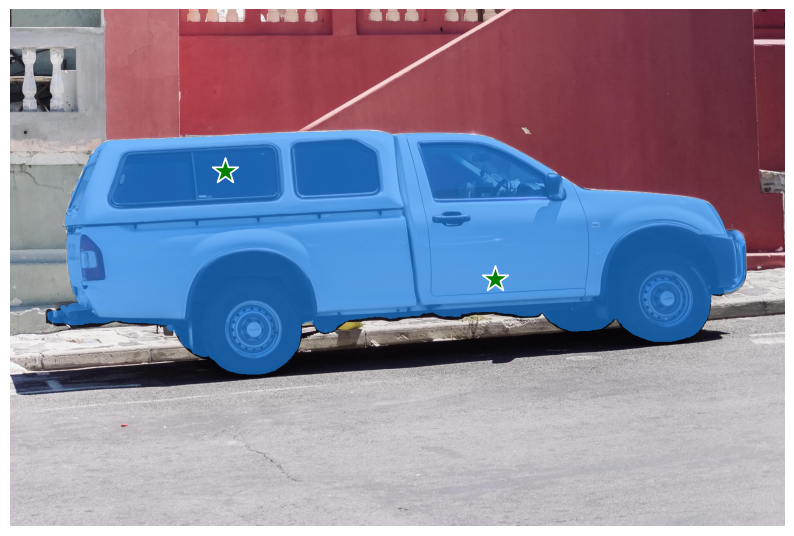

where *specifically* is something?

------------------------------------------------------------------------

### More tasks addressed in recent years

-   Style transference

-   Compression of image/video/etc…

-   Generation of content

-   Language processing

------------------------------------------------------------------------

## Deep Learning (DL) models

Models that construct knowledge in a hierarchical manner are considered
**deep models**. The most common type of deep learning models are
*artificial neural networks*.

Artifical neural networks are layered models that use the output of a
layer as the input of a subsequent layer.

What determines the complexity and accuracy of neural networks to
perform a certain tasks are their **architecture** and **parameters
$\theta$**.

<figure>
<img
src="https://www.mdpi.com/applsci/applsci-09-05507/article_deploy/html/images/applsci-09-05507-g003-550.jpg"
alt="ANN" />
<figcaption aria-hidden="true">ANN</figcaption>
</figure>

The architecture of a neural network also help us to represent the
model, implement it in a programming language, and share trained models.

A drawback of deep learning models, and artificial neural networks in
general, is their lack of explainability.

However, there are recent techniques that address that problem and try
to give some explanation to how a DL model made its prediction.

### Examples of popular DL models in computer vision

Inception v3 for image classification
![InceptionV3](https://cloud.google.com/static/tpu/docs/images/inceptionv3onc--oview.png)

U-Net for cell segmentation
![U-Net](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png)

## Train the model to learn the parameter’s values

## Evaluate the model performance

<figure>
<img
src="https://upload.wikimedia.org/wikipedia/commons/2/2d/Intersection_over_Union_-_object_detection_bounding_boxes.jpg"
alt="Object detection and localization" />
<figcaption aria-hidden="true">Object detection and
localization</figcaption>
</figure>

## Prepare our model for production

After training and evaluating our model, we can fix its parameters and
have a version that behaves good enough in the task it was trained to
carry out.

Some options to deliver our trained model are

-   Containerize it for use in HPC (Sumner, Winter)
-   Migrate it to a Cloud platform for external use
-   Share the code to build the model (github), along the pre-trained
    parameters (bucket, drive)

$\hat{y} = f_{\theta*}(x)$, where $x$ is a new real-world sample

# 2. Intro to PyTorch

## What is a tensor (PyTorch)?

A tensor is a multi-dimensional array. In PyTorch, this comes from a
generalization of the notation of variables that exists on more than two
dimensions.

-   zero-dimensional variables are points,
-   one-dimensional variables are vectors,
-   two-dimensional variables are matrices,
-   and three or more dimensional variables, are tensors.

In [1]:
import torch

x0 = torch.Tensor([7]) # This is a point

x1 = torch.Tensor([15, 64, 123]) # This is a vector

x2 = torch.Tensor([[3, 6, 5],
                   [7, 9, 12],
                   [10, 33, 1]]) # This is a matrix

x3 = torch.Tensor([[[[1, 0, 0],
                     [0, 1, 0],
                     [0, 0, 1]],
                    [[2, 0, 1],
                     [0, 2, 3],
                     [4, 1, 5]]]]) # This is a tensor

------------------------------------------------------------------------

Arithmetic operations are applied to each element inside the tensor

In [2]:
# Define a tensor of any dimension
x = torch.Tensor([[1, 3, 2], [4, 5, 7]])
x

# Define "y" as two times "x" plus five

tensor([[1., 3., 2.],
        [4., 5., 7.]])

The same happens with functions, e.g., trigonometric functions

In [3]:
# Apply a trigonometric function (e.g., sin, cos, tan) on "x"

Arithmetic operations between two tensors can be applied as well

-   [ ] Compute “z” as the sum of “x” and “y”

In [4]:
x = torch.Tensor([1, 3, 4, 7])
y = torch.Tensor([2, 5, 1, 1])

**Important** – Check the shape of the tensors first!

In [5]:
r = torch.Tensor([[1, 2], [4, 5]])
s = torch.Tensor([4, 5, 10, 11, 5])

t = r + s # This will generate an error because r and s does not have the same shape

Use the tensor’s property *.shape* to know the shape of that tensor

In [6]:
r.shape

torch.Size([2, 2])

### From Numpy to Torch

If you are familiar with Numpy’s arrays, you can convert them into
PyTorch’s tensors as follows

In [7]:
import numpy as np

In [8]:
x_np = np.array([1, 2, 3, 4])

# Define "x_pt" as a PyTorch's Tensor version of "x_np"

------------------------------------------------------------------------

# How are tensors used in Deep Learning?

We store images in form of two-dimensional tensors for black and white,
gray-scale images, and as three-dimensional tensors for color images
(RGB).

In [9]:
import matplotlib.pyplot as plt
import skimage

In [10]:
# Load some images as numpy arrays
im_bw = skimage.data.camera()
im_bw.shape

In [11]:
plt.imshow(im_bw, cmap="gray")

In [12]:
im_bw[:5, :5]

In [13]:
im_color = skimage.data.astronaut()
im_color.shape

In [14]:
plt.imshow(im_color)

In [15]:
im_color[:5, :5, :]

For convenience, PyTorch’s tensors are stored with the channels axis
before the spatial (X, Y) axis. So, lets permute the axes after
converting the image to a PyTorch’s tensor.

In [16]:
x = torch.from_numpy(im_color)

# Permute the axes of "x", so we have the color axes first, then cast the type of "x" into float type

In [17]:
print("Numpy original:", im_color.dtype)
print("PyTorch Tensor:", x.dtype)

Cast the type of data from integers to floating points, so we can apply
functions that return continuous variables.

In [18]:
# Get the mean, and standard deviation of the pixel values of "x"

In [19]:
print("Numpy original:", im_color.dtype)
print("PyTorch Tensor:", x.dtype)

## Training with mini-batches of images

PyTorch can operate efficiently on multiple images at the same time. To
do that, we need to stack these images into a single tensor first.

That is because operations in PyTorch expect the images to have the
following axes order **B,C,H,W** 1. **B**: Batch size, 2. **C**: Number
of Channels, 3. **H**: Height, and 4. **W**: Width

In [20]:
im1 = skimage.data.astronaut()
x1 = torch.from_numpy(im1).permute(2, 0, 1)
x1 = x1.float()

im2 = skimage.data.cat()
x2 = torch.from_numpy(im2).permute(2, 0, 1)
x2 = x2.float()

print(x1.shape)
print(x2.shape)

Crop, resize, apply color transformations to images, so these are of the
same shape and number of channels.

In [21]:
# Take a patch of size 256x256 pixels from each image

# Stack the patches into a batch of tensors at dimension 0

------------------------------------------------------------------------

# PyTorch’s building blocks

Deep learning models are defined as hierarchical transformations
arranged as *layers*. Each *layer* takes an input (the original image,
or from a previous layer) and computes its output using some
**operations** and **functions**. Then that output is used as input for
the next layer …

## Convolution layers

The most common operation in DL models for image processing are
Convolution operations.

<figure>
<img
src="https://upload.wikimedia.org/wikipedia/commons/8/85/Convolution_arithmetic_-_Full_padding_no_strides_transposed.gif"
alt="2D Convolution" />
<figcaption aria-hidden="true">2D Convolution</figcaption>
</figure>

The animation shows the convolution of a 7x7 pixels input image (bottom)
with a 3x3 pixels kernel (moving window), that results in a 5x5 pixels
output (top).

### The effect of convolution operations

In [22]:
kernel = torch.Tensor([[
    [[0, 0, 0],
     [0, 0, 0],
     [0, 0, 0]], # This part of the Kernel will operate on the Red channel of the images

    [[0, 0, 0],
     [0, 0, 0],
     [0, 0, 0]], # This part of the Kernel will operate on the Green channel of the images

    [[0, -1, 0],
     [-1, 5, -1],
     [0, -1, 0]], # This part of the Kernel will operate on the Blue channel of the images
    ]])

## Result of the convolution between an image and the kernel

In [23]:
im = skimage.data.cat()

x = torch.from_numpy(im).float().permute(2, 0, 1)

# We add a "dummy" dimension to our tensor "x" so it has the BCHW axes
x = x[None, ...]

# Use the con2d function from torch.nn.functional
output = torch.nn.functional.conv2d(x, kernel, padding=0)
output.shape

plt.imshow(output[0, 0], cmap="gray")

Experiment with different values and shapes of the kernel
https://en.wikipedia.org/wiki/Kernel\_(image_processing)

------------------------------------------------------------------------

### Convolution layers from torch.nn module

In [24]:
# Use the Conv2d module from torch.nn to define a learnable convolution layer
conv_1 =

In [25]:
y = conv_1(x)
y.shape

In [26]:
#@title Visualize the output of the randomly initialized kernel of the convolution layer
plt.imshow((y[0].detach().permute(1, 2, 0) - y[0].detach().min()) / (y[0].detach().max() - y[0].detach().min()))

## Linear layers

These layers perform matrix-matrix, and matrix-vector operations on its
corresponding inputs. Linear layers are commonly used in final layers to
obtain the output of the model.

For classification tasks, these layers project a multi-channel feature
map into a single prediction of the image’s class.

<figure>
<img src="https://wngaw.github.io/images/inception_v3_architecture.png"
alt="Inception V3" />
<figcaption aria-hidden="true">Inception V3</figcaption>
</figure>

In object detection and localization problems, these layers generate the
detection confidence and bounding box of the object.

<figure>
<img
src="https://viso.ai/wp-content/uploads/2021/02/yolo-object-detection.jpg"
alt="YOLO" />
<figcaption aria-hidden="true">YOLO</figcaption>
</figure>

### Linear layers from torch.nn

In [27]:
# Use the Linear module from torch.nn to define a linear operation
lin_1 =

------------------------------------------------------------------------

## Non-linear activation layers

These layers are integrated to add non-linear behavior into the neural
network.

In [28]:
# Define a Rectified Linear Unit (ReLU) layer using the torch.nn module
relu_1 =

A list of activation layers here
https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

------------------------------------------------------------------------

## Pooling layers

This kind of layers are used to downsample the current feature maps
which helps to summarize information from large regions into a couple of
pixels.

There are two common pooling operations: maximum pooling, and average
pooling.

Maximum pooling looks for the maximum value in a region and returns it
as a single pixel. While average pooling computes the average value for
that region.

``` twpnieneid="uuha-fslr7w_"
# Define a Maximum Pooling layer from torch.nn module
max_pool =
```

# 3.- Review and understand the architecture of classic and recent DL models

## LeNet 5 architecture

http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

``` python
import torch
import torch.nn as nn
```

``` python
# Implement the layers of LeNet5
```

Test our implementation

``` python
```

## U-Net

<figure>
<img
src="https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png"
alt="U-Net" />
<figcaption aria-hidden="true">U-Net</figcaption>
</figure>

Lets impelment the first operations of U-Net

``` python
```